In [1]:
! pip install semantic-kernel -U


In [2]:
# import os
# import sys
# import json
import pandas as pd



In [3]:

import semantic_kernel as sk
import semantic_kernel.connectors.ai.open_ai as skaoai

In [4]:
kernel = sk.Kernel()

In [5]:
deployment = 'Your Azure OpenAI Service Deployment name'
api_key = 'Your Azure OpenAI Service API Key'
endpoint = 'Your Azure OpenAI Service Endpoint' 

In [6]:
kernel.add_chat_service("azure_chat_competion_service", skaoai.AzureChatCompletion("GPT4Model",endpoint,api_key=api_key,api_version = "2023-12-01-preview"))


Kernel(plugins=KernelPluginCollection(plugins={}), prompt_template_engine=PromptTemplateEngine(), memory=NullMemory(), text_completion_services={'azure_chat_competion_service': <function Kernel.add_text_completion_service.<locals>.<lambda> at 0x7f92ba4f7520>}, chat_services={'azure_chat_competion_service': <function Kernel.add_chat_service.<locals>.<lambda> at 0x7f92ba34c550>}, text_embedding_generation_services={}, default_text_completion_service='azure_chat_competion_service', default_chat_service='azure_chat_competion_service', default_text_embedding_generation_service=None, retry_mechanism=PassThroughWithoutRetry(), function_invoking_handlers={}, function_invoked_handlers={})

In [7]:
base_skills_directory = './plugins'

In [8]:
plugins = kernel.import_semantic_plugin_from_directory(base_skills_directory , "DataPlugin")

In [9]:
df = pd.read_csv("./datasets/ProductList.csv")

In [10]:
variables = sk.ContextVariables()

variables["question"]= "Generate a bar chart to list Product Type and display the number of products owned by the corresponding Product Type"

In [11]:
csv_plugin = plugins["csv"]
pysql_plugin = plugins["spark"]
sql_plugin = plugins["sql"]

In [12]:
result = await csv_plugin.invoke(variables=variables)

In [13]:
result.result

"import matplotlib.pyplot as plt; \n\nproduct_counts = df['Product Type'].value_counts(); \nproduct_counts.plot(kind='bar'); \nplt.xlabel('Product Type'); \nplt.ylabel('Number of Products'); \nplt.title('Number of Products per Product Type'); \nplt.xticks(rotation=270); \nplt.show()"

In [14]:
sql = result.result.replace("\\n","").replace("\\n\\n", "")

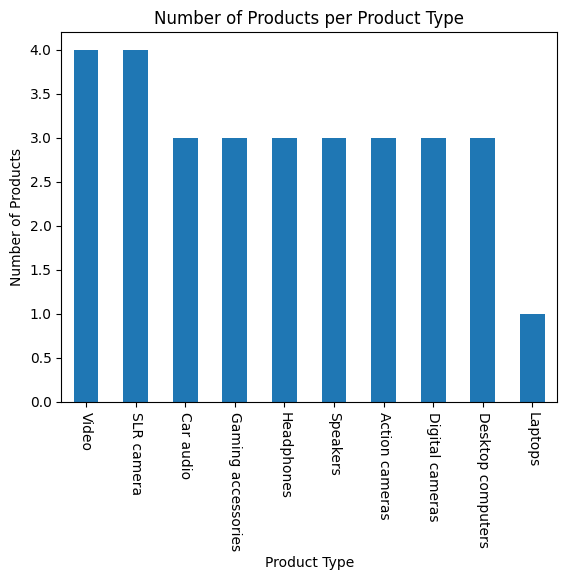

In [15]:
exec(sql)

In [16]:
variables = sk.ContextVariables()

variables["question"]= "Find Product Type belonging to Car audio and display them as table "

In [17]:
result = await csv_plugin.invoke(variables=variables)

In [18]:
exec(result.result)

             Title   Code Name Product Line Product Type         Color  Notes
3   Car Audio 1000  CARAud1000        Audio    Car audio  Chrome/Black    NaN
12  Car Audio 2000  CARAud2000        Audio    Car audio  Chrome/Black    NaN
19  Car Audio 2500  CARAud2500        Audio    Car audio  Chrome/Black    NaN
